In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
import gower
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings("ignore")


__DATA PREPARATION & EXPLORATION__

In [3]:
# load data
artikel = pd.read_excel(r"C:\Users\IM-KI\Documents\PrEvelop_Daten_mkPlast\PrEvelOp_mkPlast_01_Esb.xlsx")
arbeitsplanzeilen = pd.read_excel(r"C:\Users\IM-KI\Documents\PrEvelop_Daten_mkPlast\PrEvelOp_mkPlast_01_Esb_Arbeitszeilen.xlsx")

In [4]:
# set identifier
artikel.rename(columns={'Nr.': 'index'}, inplace=True)
artikel.set_index('index', inplace=True)
display(artikel.head(5))
arbeitsplanzeilen.rename(columns={'Arbeitsplannr.': 'index'}, inplace=True)
arbeitsplanzeilen.set_index('index', inplace=True)
display(arbeitsplanzeilen.head(5))

,Beschreibung,Beschreibung 2,Mengeneinheit,Rohstoff,Artikelgruppe,Produktgruppe,Foliencode,Farbcode,Arbeitsplannr.,Breite(mm),...,Rollendurchmesser(mm),Rollenlänge(m),Stk pro Rolle,Randbeschnitt(mm),Bündelung(stk),Gewicht / 1000m,Echt Gewicht / 1000m,Gewicht / 1000skt,Echt Gewicht / 1000skt,MFI
index,,,,,,,,,,,,,,,,,,,,,
100012,MDPE Seitenfaltenbeutel,-Ascalon Umbeutel-,STK,MDPE,KONFEKTION,SFB,MT-LOS-,TRANSPARENT,100012,180,...,0,0.0,0,0,0,22.5120,22.463061,10.580640,10.557639,0.0
100013,HDPE Seitenfaltenbeutel,NaN,STK,HDPE,KONFEKTION,SFB,BL-,BLAU DUNKEL-2,100013,580,...,0,0.0,0,0,50,19.4616,0.000000,12.844656,0.000000,0.0
100014,LDPE Flachfolienzuschnitte,NaN,STK,LDPE,KONFEKTION,ZUS,ST-,TRANSPARENT,100014,600,...,0,0.0,0,0,500,11.0880,0.000000,7.761600,0.000000,0.0
100015,HDPE Seitenfaltenbeutel,NaN,STK,HDPE,KONFEKTION,SFB,LME-ST-,BLAU HELL-2,100015,400,...,0,0.0,0,0,500,13.3560,13.340224,4.674600,4.669078,0.0
100017,MDPE Flachbeutel,NaN,STK,MDPE,KONFEKTION,FB,LME-LOS-,ROT 5500-3,100017,395,...,0,0.0,0,0,0,33.3459,32.936424,24.675966,24.372954,0.0


,Versionscode,Arbeitsgangnr.,Nächste Arbeitsgangnr.,Vorherige Arbeitsgangnr.,Art,Nr.,Arbeitsplatzgruppennr.,Abteilungscode,Beschreibung,Rüstzeit,...,Reihenfolge (Rückwärts),Kum. feste Ausschussmenge,Kum. Ausschussfaktor %,Takt,kalk. Durchsatz,kalk. Bearbeitungszeit,Durchsatz,Nutzen (Bahnigkeit),Nutzen (Lagigkeit),Abzugsgeschwindigkeit
index,,,,,,,,,,,,,,,,,,,,,
100012,NaN,100,NaN,NaN,Arbeitsplatzgruppe,21.0,21.0,KONFEKTION,BSZ II,0.5,...,1,0,0.0,0.0,0.0,0.0,25000.0,3,1,0.0
100013,NaN,100,NaN,NaN,Arbeitsplatzgruppe,21.0,21.0,KONFEKTION,BSZ II,0.5,...,1,0,0.0,0.0,0.0,0.0,0.0,2,1,0.0
100014,NaN,100,NaN,NaN,Arbeitsplatzgruppe,20.0,20.0,KONFEKTION,BSZ I,0.5,...,1,0,0.0,0.0,0.0,0.0,0.0,2,4,0.0
100015,NaN,100,NaN,NaN,Arbeitsplatzgruppe,21.0,21.0,KONFEKTION,BSZ II,0.5,...,1,0,0.0,140.0,0.0,0.0,16800.0,2,1,0.0
100016,NaN,100,NaN,NaN,Arbeitsplatzgruppe,3.0,3.0,EXTRUSION,EX3,0.5,...,1,0,0.0,0.0,0.0,0.0,0.0,1,1,0.0


In [5]:
# check if identifier is unique
print(artikel.index.is_unique)
print(arbeitsplanzeilen.index.is_unique)
# count values in Arbeitsplannr.
artikel['Arbeitsplannr.'].value_counts()

True
False


Arbeitsplannr.
300322    82
102235    63
107616    20
100195    11
103802    10
          ..
105879     1
105880     1
105881     1
105882     1
306171     1
Name: count, Length: 13548, dtype: int64

In [6]:
# drop row in arbeitsplatzeilen with duplicate index
arbeitsplanzeilen = arbeitsplanzeilen[~arbeitsplanzeilen.index.duplicated(keep='first')]


In [7]:
# count nan values of Arbeitsplannr. in artikel
artikel['Arbeitsplannr.'].isna().sum()

1097

In [8]:
# drop rows with nan values in Arbeitsplannr.
artikel = artikel.dropna(subset=['Arbeitsplannr.'])

In [9]:
artikel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15165 entries, 100012 to 700002
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Beschreibung            15165 non-null  object 
 1   Beschreibung 2          1988 non-null   object 
 2   Mengeneinheit           15165 non-null  object 
 3   Rohstoff                15165 non-null  object 
 4   Artikelgruppe           15164 non-null  object 
 5   Produktgruppe           15164 non-null  object 
 6   Foliencode              14445 non-null  object 
 7   Farbcode                15161 non-null  object 
 8   Arbeitsplannr.          15165 non-null  object 
 9   Breite(mm)              15165 non-null  int64  
 10  Seitenfalte(mm)         15165 non-null  int64  
 11  Länge(mm)               15165 non-null  int64  
 12  Stärke(mm)              15165 non-null  float64
 13  Echte Stärke(mm)        15165 non-null  float64
 14  Dichte(g/cm³)           15165 non-nul

In [10]:
# drop column 'Beschreibung 2'
artikel.drop(columns=['Beschreibung 2'], inplace=True)

In [11]:
# count number of rows with zero values for all columns in artikel
for column in artikel.columns:
    print(str(column)+':', (artikel[column] == 0).sum())

Beschreibung: 0
Mengeneinheit: 0
Rohstoff: 0
Artikelgruppe: 0
Produktgruppe: 0
Foliencode: 0
Farbcode: 0
Arbeitsplannr.: 0
Breite(mm): 2
Seitenfalte(mm): 8527
Länge(mm): 8719
Stärke(mm): 2
Echte Stärke(mm): 976
Dichte(g/cm³): 8
Rollengewicht (kg): 15085
Rollendurchmesser(mm): 14250
Rollenlänge(m): 13046
Stk pro Rolle: 15160
Randbeschnitt(mm): 14226
Bündelung(stk): 12364
Gewicht / 1000m: 6
Echt Gewicht / 1000m: 1675
Gewicht / 1000skt: 8717
Echt Gewicht / 1000skt: 9432
MFI: 15165


In [12]:
# drop columns 
columns_keep = ['Arbeitsplatzgruppennr.','Abteilungscode','Beschreibung','Rüstzeit','Bearbeitungszeit','Takt','kalk. Durchsatz','kalk. Bearbeitungszeit','Durchsatz','Nutzen (Bahnigkeit)','Nutzen (Lagigkeit)']
arbeitsplanzeilen = arbeitsplanzeilen[columns_keep]

In [13]:
arbeitsplanzeilen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13926 entries, 100012 to 77
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Arbeitsplatzgruppennr.  13923 non-null  float64
 1   Abteilungscode          13923 non-null  object 
 2   Beschreibung            13922 non-null  object 
 3   Rüstzeit                13926 non-null  float64
 4   Bearbeitungszeit        13926 non-null  float64
 5   Takt                    13926 non-null  float64
 6   kalk. Durchsatz         13926 non-null  float64
 7   kalk. Bearbeitungszeit  13926 non-null  float64
 8   Durchsatz               13926 non-null  float64
 9   Nutzen (Bahnigkeit)     13926 non-null  int64  
 10  Nutzen (Lagigkeit)      13926 non-null  int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 1.3+ MB


In [14]:
#count number of rows with zero values for all columns in arbeitsplanzeilen
for column in arbeitsplanzeilen.columns:
    print(str(column)+':', (arbeitsplanzeilen[column] == 0).sum())

Arbeitsplatzgruppennr.: 0
Abteilungscode: 0
Beschreibung: 0
Rüstzeit: 76
Bearbeitungszeit: 239
Takt: 10356
kalk. Durchsatz: 12808
kalk. Bearbeitungszeit: 12794
Durchsatz: 3571
Nutzen (Bahnigkeit): 0
Nutzen (Lagigkeit): 0


In [15]:
list_a = artikel['Arbeitsplannr.'].unique().tolist()
list_b = arbeitsplanzeilen.index.unique().tolist()
print(len(list_a))
print(len(list_b))
# change type of list_b to string
list_b = [str(i) for i in list_b]
# count number of values in list_a that are not in list_b
print(len(set(list_a) - set(list_b)))
# show values in list_a that are not in list_b
print(set(list_a) - set(list_b))

13548
13926
7
{'108181', '304936', '108182', '108183', '110121', '300645', '108177'}


In [16]:
drop_list = list(set(list_a) - set(list_b))
# drop rows in artikel with Arbeitsplannr. in drop_list
artikel = artikel[~artikel['Arbeitsplannr.'].isin(drop_list)]

In [17]:
# change dtype of index in arbeitsplanzeilen to string
arbeitsplanzeilen.index = arbeitsplanzeilen.index.astype(str)

In [18]:
# merge artikel and arbeitsplanzeilen
mkplast = pd.merge(artikel, arbeitsplanzeilen, left_on='Arbeitsplannr.', right_index=True, how='left')

In [19]:
# drop column 'Arbeitsplannr.'
mkplast.drop(columns=['Arbeitsplannr.'], inplace=True)

In [20]:
# delete rows with nan values
mkplast = mkplast.dropna()

In [30]:
mkplast['Beschreibung_x'].value_counts().head(50)

Beschreibung_x
HDPE Seitenfaltenbeutel                         1695
MDPE Schlauchfolie                              1693
HDPE Seitenfaltenschlauch                       1586
MDPE Seitenfaltenbeutel                         1572
MDPE Seitenfaltenschlauch                       1391
MDPE Flachbeutel                                1297
HDPE Schlauchfolie                              1087
HDPE Flachfolie                                  872
HDPE Flachfolienzuschnitte                       729
HDPE Flachbeutel                                 582
HDPE Doppelflachfolie                            371
MDPE Flachfolienzuschnitte                       134
MDPE Flachfolie                                  132
HDPE Halbschlauchfolie                           129
LDPE Seitenfaltenbeutel                          122
Flachfolie                                       117
LDPE Schlauchfolie                               113
LDPE Flachfolie                                  105
LDPE Seitenfaltenschlauch      

In [37]:
# count number of unique values in 'Beschreibung_x'
print(mkplast['Beschreibung_x'].nunique())

76


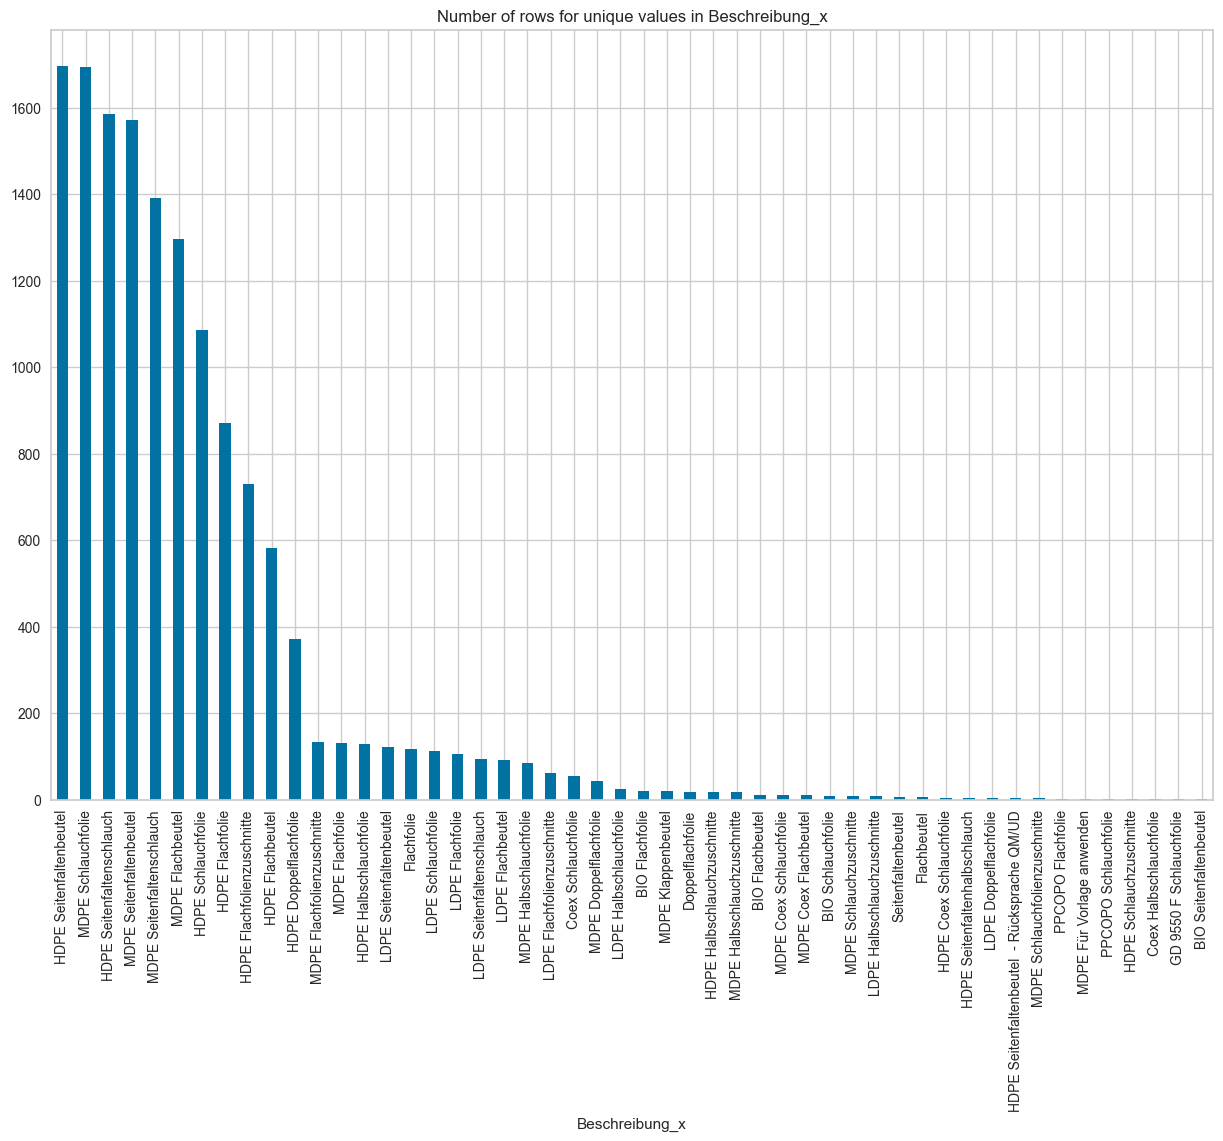

In [42]:
# create barplot for number of rows for unique values in Bescheibung_x column sorted by count, show only top 50
plt.figure(figsize=(15,10))
mkplast['Beschreibung_x'].value_counts().head(50).plot(kind='bar')
# add title
plt.title('Number of rows for unique values in Beschreibung_x')
plt.show()


__PREPROCESSING__

In [ ]:
### Preprocessing
# save all columns with DType object in list
cat_columns = mkplast.select_dtypes(include=['object']).columns.tolist()

# save all columns with DType float64 or int64 in list
num_columns = mkplast.select_dtypes(include=['float64', 'int64']).columns.tolist()

# split dataframe
df_num = mkplast[num_columns]
df_cat = mkplast[cat_columns]

In [ ]:
df_num = mkplast[num_columns]
df_cat = mkplast[cat_columns]

In [ ]:
# encode the categorical columns
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_cat)
df_cat_encoded = pd.DataFrame(data=enc.transform(df_cat).toarray(), index=df_cat.index, columns=enc.get_feature_names_out())

# scale the numerical columns with MaxAbsScaler
scaler = MaxAbsScaler().fit(df_num)
df_num_scaled = pd.DataFrame(data=scaler.transform(df_num), index=df_num.index, columns=df_num.columns)

# concatenate the subdataframes columnwise
mkplast_preprocessed = pd.concat([df_num_scaled, df_cat_encoded], axis=1)
mkplast_preprocessed

,Breite(mm),Seitenfalte(mm),Länge(mm),Stärke(mm),Echte Stärke(mm),Dichte(g/cm³),Rollengewicht (kg),Rollendurchmesser(mm),Rollenlänge(m),Stk pro Rolle,...,Beschreibung_y_EX6,Beschreibung_y_EX7,Beschreibung_y_EX8,Beschreibung_y_Folienzukauf,Beschreibung_y_HSR 1250,Beschreibung_y_Pohl GmbH,Beschreibung_y_Renotec,Beschreibung_y_Renotec II,Beschreibung_y_Rollomat,Beschreibung_y_Trennnaht
index,,,,,,,,,,,,,,,,,,,,,
100012,0.072,0.085714,0.060256,0.133333,0.160,0.013211,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100013,0.232,0.314286,0.080769,0.033333,0.000,0.013427,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100014,0.240,0.000000,0.089744,0.066667,0.000,0.013031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100015,0.160,0.214286,0.044872,0.033333,0.040,0.013449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100017,0.158,0.000000,0.094872,0.150000,0.164,0.014352,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306167,0.474,0.000000,0.000000,0.316667,0.380,0.014001,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306168,0.228,0.314286,0.000000,0.078333,0.094,0.014015,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306169,0.160,0.242857,0.000000,0.158333,0.190,0.013983,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__CLUSTERING__

In [ ]:
# calculate distance matrix with gower distance
gower_matrix = gower.gower_matrix(mkplast)

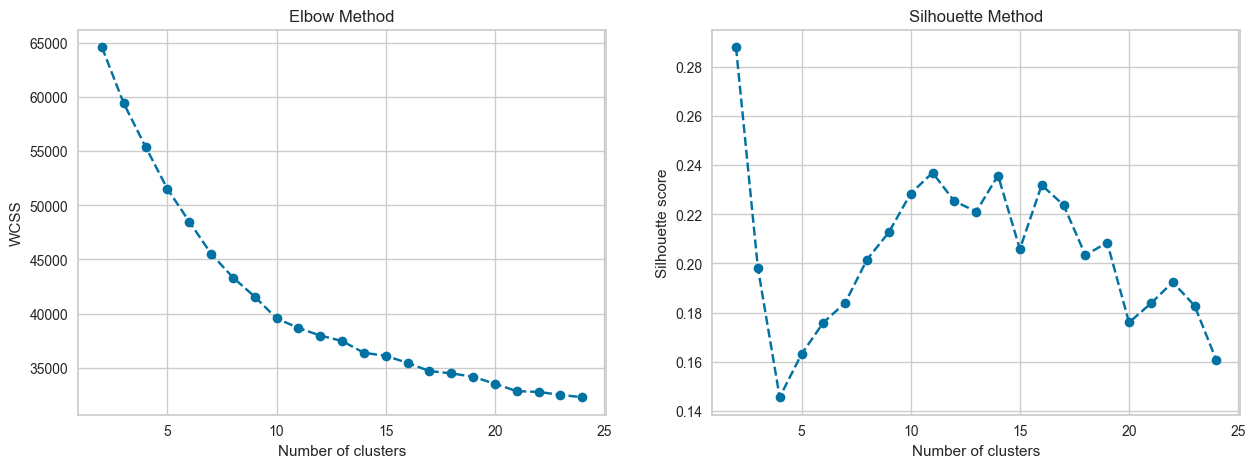

In [ ]:
# apply elbow and shilouette method to preprocessed dataframe to find the optimal number of clusters
wcss = [] 
silhouette_avg = []
for i in range(2, 25): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(mkplast_preprocessed) 
    # wcss score
    wcss.append(kmeans.inertia_)
    # silhouette score
    silhouette_avg.append(silhouette_score(mkplast_preprocessed, kmeans.fit_predict(mkplast_preprocessed)))

# subplot with two plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
xticks = range(2, 25)
# plot wcss score
ax[0].plot(range(2, 25), wcss, marker='o', linestyle='--')
# plot silhouette score
ax[1].plot(range(2, 25), silhouette_avg, marker='o', linestyle='--')
# make x-labels
ax[0].set_xlabel('Number of clusters')
ax[1].set_xlabel('Number of clusters')
# make y-labels
ax[0].set_ylabel('WCSS')
ax[1].set_ylabel('Silhouette score')
# make title
ax[0].set_title('Elbow Method')
ax[1].set_title('Silhouette Method')
# show plot
plt.show()

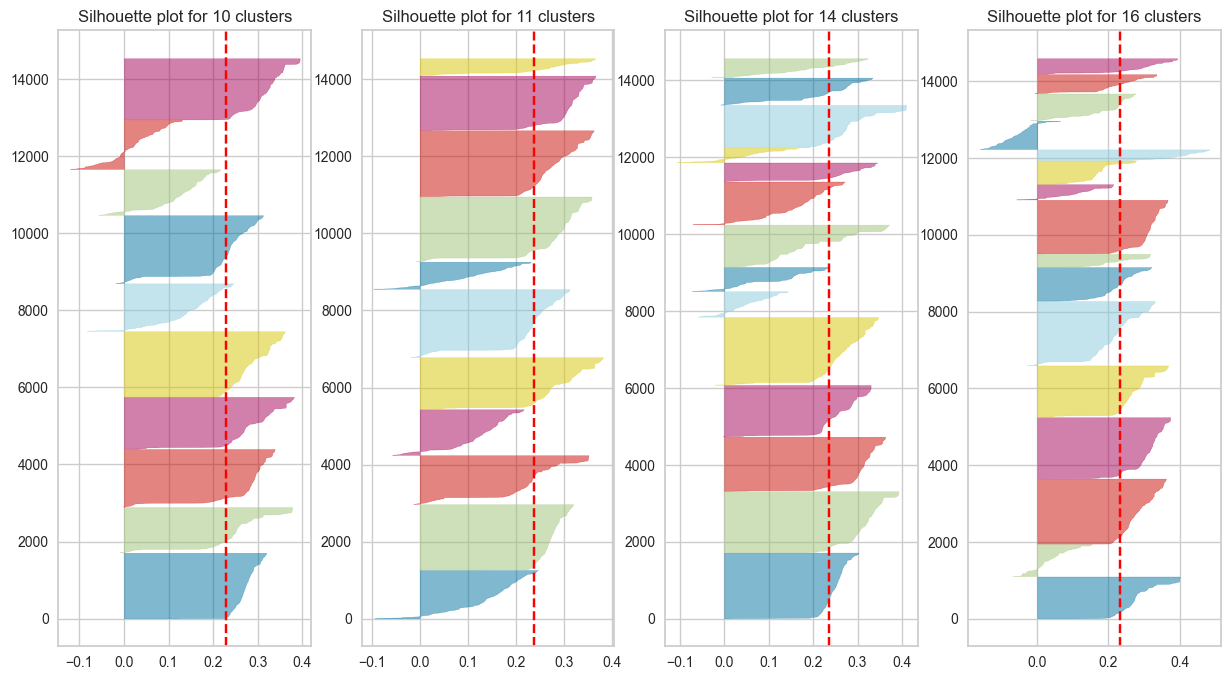

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(15,8))
q = 0
for i in [10, 11, 14, 16]:
    # Create KMeans instances for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q])
    # title for subplot
    ax[q].set_title('Silhouette plot for '+str(i)+' clusters')
    visualizer.fit(mkplast_preprocessed)
    q += 1